In [8]:
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
import numpy as np
from itertools import product
import seaborn as sns
sns.set()

%matplotlib inline

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [9]:
def get_fte_bte(err, ntrees, cv):
    bte = [[] for i in range(10)]
    te = [[] for i in range(10)]
    fte = []
    
    #single_err = unpickle('../results/'+'LF_single_task_'+str(ntrees)+'__'+str(cv+1)+'.pickle')

    single_err = unpickle('/data/Jayanta/continual-learning/crossval_res_singletask/'+'LF_single_task_'+str(ntrees)+'__'+str(cv+1)+'.pickle')
    #print('/data/Jayanta/continual-learning/crossval_res_singletask/'+'LF_single_task_'+str(ntrees)+'__'+str(cv+1)+'.pickle')
    for i in range(10):
        for j in range(i,10):
            #print(err[j][i],j,i)
            bte[i].append(err[i][i]/err[j][i])
            te[i].append(single_err[i]/err[j][i])
                
    for i in range(10):
        #print(single_err[i],err[i][i])
        fte.append(single_err[i]/err[i][i])
            
            
    return fte,bte,te

In [10]:
def calc_mean_bte(btes,task_num=10,cv=6):
    mean_bte = [[] for i in range(task_num)]


    for j in range(task_num):
        tmp = 0
        for i in range(cv):
            tmp += np.array(btes[i][j])
        
        tmp=tmp/cv
        mean_bte[j].extend(tmp)
            
    return mean_bte     

In [11]:
def calc_mean_te(tes,task_num=10,cv=6):
    mean_te = [[] for i in range(task_num)]

    for j in range(task_num):
        tmp = 0
        for i in range(cv):
            tmp += np.array(tes[i][j])
        
        tmp=tmp/cv
        mean_te[j].extend(tmp)
            
    return mean_te 

In [12]:
def calc_mean_fte(ftes,task_num=10,cv=6):
    fte = np.asarray(ftes)
    
    return list(np.mean(np.asarray(fte_tmp),axis=0))

In [13]:
def calc_mean_err(err,task_num=10,cv=6):
    mean_err = [[] for i in range(task_num)]


    for j in range(task_num):
        tmp = 0
        for i in range(cv):
            tmp += np.array(err[i][j])
        
        tmp=tmp/cv
        print(tmp)
        mean_err[j].extend([tmp])
            
    return mean_err     

In [14]:
ntrees = 100
cvs = 6
alg_num = 1
task_num = 10

btes = [[] for i in range(task_num)]
ftes = [[] for i in range(task_num)]
tes = [[] for i in range(task_num)]
err_ = [[] for i in range(task_num)]

te_tmp = [[] for _ in range(cvs)]
bte_tmp = [[] for _ in range(cvs)]
fte_tmp = [[] for _ in range(cvs)]
err_tmp = [[] for _ in range(cvs)]
    
for cv in range(cvs):
    #filename = '../result/'+'LF_'+str(ntrees)+'__'+str(cv+1)+'.pickle'

    filename = '/data/Jayanta/continual-learning/crossval_res/'+'LF_'+str(ntrees)+'__'+str(cv+1)+'.pickle'
    print(filename)
    err = unpickle(filename)
    fte, bte, te = get_fte_bte(err,ntrees,cv)
    
    err_ = [[] for i in range(task_num)]
    for i in range(task_num):
        for j in range(task_num-i):
            #print(err[i+j][i])
            err_[i].append(err[i+j][i])
            
    te_tmp[cv].extend(te)
    bte_tmp[cv].extend(bte)
    fte_tmp[cv].extend(fte)
    err_tmp[cv].extend(err_)
    

te = calc_mean_te(te_tmp)
bte = calc_mean_bte(bte_tmp)
fte = calc_mean_fte(fte_tmp)
error = calc_mean_err(err_tmp)

/data/Jayanta/continual-learning/crossval_res/LF_100__1.pickle
/data/Jayanta/continual-learning/crossval_res/LF_100__2.pickle
/data/Jayanta/continual-learning/crossval_res/LF_100__3.pickle
/data/Jayanta/continual-learning/crossval_res/LF_100__4.pickle
/data/Jayanta/continual-learning/crossval_res/LF_100__5.pickle
/data/Jayanta/continual-learning/crossval_res/LF_100__6.pickle
[0.51333333 0.505      0.50516667 0.50883333 0.5075     0.50416667
 0.50716667 0.50683333 0.50683333 0.50783333]
[0.57333333 0.5715     0.57116667 0.5705     0.57333333 0.57516667
 0.57266667 0.577      0.5785    ]
[0.49433333 0.498      0.49883333 0.4995     0.49933333 0.50083333
 0.50566667 0.50483333]
[0.53083333 0.532      0.53233333 0.53166667 0.53366667 0.533
 0.53416667]
[0.50266667 0.50466667 0.50383333 0.506      0.50866667 0.50866667]
[0.4795     0.47916667 0.47783333 0.48033333 0.479     ]
[0.45366667 0.44983333 0.45166667 0.45266667]
[0.483      0.4865     0.48616667]
[0.53333333 0.53233333]
[0.44383333

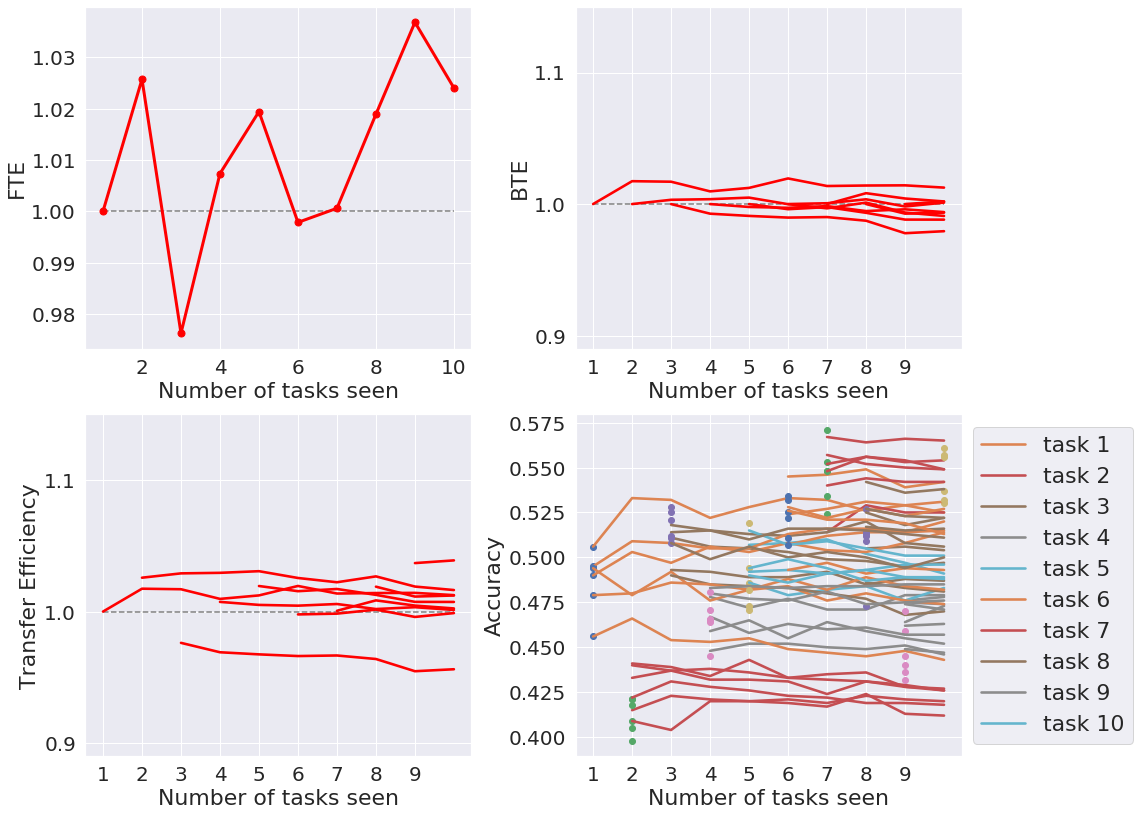

In [30]:
sns.set()

clr = ["#e41a1c", "#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(clr))

fontsize=22
ticksize=20

fig, ax = plt.subplots(2,2, figsize=(16,11.5))
#fig.suptitle('ntrees = '+str(ntrees),fontsize=25)
ax[0][0].plot(np.arange(1,11), fte, c='red', marker='.', markersize=14, linewidth=3)
ax[0][0].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)
ax[0][0].tick_params(labelsize=ticksize)
ax[0][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][0].set_ylabel('FTE', fontsize=fontsize)

n_tasks=10
for i in range(n_tasks):

    et = np.asarray(bte[i])

    ns = np.arange(i + 1, n_tasks + 1)
    ax[0][1].plot(ns, et, c='red', linewidth = 2.6)
    
ax[0][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][1].set_ylabel('BTE', fontsize=fontsize)
ax[0][1].set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax[0][1].set_xticks(np.arange(1,10))
ax[0][1].set_ylim(0.89, 1.15)
ax[0][1].tick_params(labelsize=ticksize)
ax[0][1].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)


n_tasks=10
for i in range(n_tasks):

    et = np.asarray(te[i])

    ns = np.arange(i + 1, n_tasks + 1)
    ax[1][0].plot(ns, et, c='red', linewidth = 2.6)
    
ax[1][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][0].set_ylabel('Transfer Efficiency', fontsize=fontsize)
ax[1][0].set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax[1][0].set_xticks(np.arange(1,10))
ax[1][0].set_ylim(0.89, 1.15)
ax[1][0].tick_params(labelsize=ticksize)
ax[1][0].hlines(1, 1,10, colors='grey', linestyles='dashed',linewidth=1.5)


n_tasks=10
cv = 6
for cv_ in range(cv):
    single_err = unpickle('/data/Jayanta/continual-learning/crossval_res_singletask/'+'LF_single_task_'+str(ntrees)+'__'+str(cv_+1)+'.pickle')
    
    for i in range(n_tasks):
        et = np.asarray(err_tmp[cv_][i])
        ns = np.arange(i + 1, n_tasks + 1)
        
        ax[1][1].plot(i+1, 1-single_err[i], marker='o')
        if cv_==0:
            ax[1][1].plot(ns, 1-et, label='task '+str(i+1) ,linewidth = 2.6)
        else:
            ax[1][1].plot(ns, 1-et, linewidth = 2.6)

            
ax[1][1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax[1][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][1].set_ylabel('Accuracy', fontsize=fontsize)
#ax[1][1].set_yticks([.4,.6,.8,.9,1, 1.1,1.2])
ax[1][1].set_xticks(np.arange(1,10))
#ax[1][1].set_ylim(0.89, 1.15)
ax[1][1].tick_params(labelsize=ticksize)

plt.savefig('/data/Jayanta/fig_trees'+str(ntrees)+'.png',dpi=300)

In [20]:
err_tmp[cv_][i]

[0.494,
 0.46699999999999997,
 0.46799999999999997,
 0.478,
 0.472,
 0.46699999999999997,
 0.46799999999999997,
 0.474,
 0.471,
 0.475]